In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

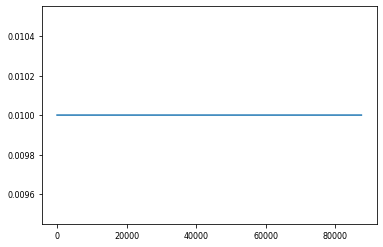

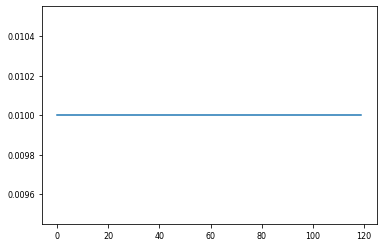

In [4]:
def get_sigma(step, max_sigma=0.15, min_sigma=0.01, decay_period=None):
    sigma = max_sigma - (max_sigma - min_sigma)
    return sigma

# Exploration Policy
timeslots_per_day = 24
max_sigma = 0.7
min_sigma = 0.01

noise_log = []


for yr in range(10):
    step = 0
    episode = 0
    for t in range(1, 365 * timeslots_per_day):
        if t%timeslots_per_day == 0:
            episode +=1
            step = episode
        else:
            step += 1
            
        if np.random.random() > 0.9:
            step-= timeslots_per_day
            step = max(0,step)
        noise = get_sigma(step, max_sigma, min_sigma)
        noise_log.append(noise)
plt.plot(noise_log)
plt.show()
plt.plot(noise_log[0:5 * timeslots_per_day ])
plt.show()

In [2]:
# non-linear batt-centric policy generator
def k_factor(batt,k=0.95):
    x = (batt-0.1)/0.9
    y = (x-k*x)/(k-2*k*x+1)
    action = y
    return action

In [3]:
batt = np.linspace(0.1,1,100)
conformity = k_factor(batt, k=0.7)

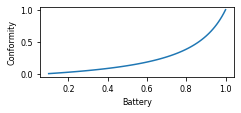

In [7]:
single_column_figure_width = 3.487
double_column_figure_width = 7
fig_width = single_column_figure_width
fig_height = fig_width / 1.618 *0.6

fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.05)
axs.plot(batt,conformity)
axs.set_xlabel("Battery")
axs.set_ylabel("Conformity")
fig.savefig('./figures/kplot.png', dpi=300, bbox_inches='tight', transparent=True)